<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/bootcamp_team/deeplearning/%EC%A7%91_class_5%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = '/content/drive/MyDrive/'

In [ ]:
name = os.listdir(dir)
name

['Colab Notebooks',
 'test_total_image',
 'Scan_0008_1.jpg',
 'Scan_0009_2.jpg',
 '7 classes model',
 '뿌리 전체',
 '1_엑스레이',
 '3_뿌리_강조',
 '2_지면_위로_뿌리',
 '뿌리_models',
 '뿌리_models2',
 '2_지면_위로_뿌리_2',
 '동물_곤충_O',
 '동물_곤충_X',
 '나이테_나무껍질_옹이_X',
 '나이테_나무껍질_옹이_O',
 '줄기 전체',
 '3_나무위의집',
 '1_일반집',
 '2_현대집',
 '4_교회',
 '5_절',
 '집전체']

In [ ]:
_1, _2, _3, _4, _5, _6 = [],[],[],[],[],[]
_1.append(os.listdir(dir + '1_일반집'))
_2.append(os.listdir(dir +'2_현대집'))
_3.append(os.listdir(dir + '3_나무위의집'))
_4.append(os.listdir(dir + '4_교회'))
# _5.append(os.listdir(dir + '5_절'))

In [ ]:
total_list = []
total_list.append(os.listdir(dir + '1_일반집'))
total_list.append(os.listdir(dir +'2_현대집'))
total_list.append(os.listdir(dir + '3_나무위의집'))
total_list.append(os.listdir(dir + '4_교회'))
# total_list.append(os.listdir(dir + '5_절'))
print(total_list)

[['일반집 (450).png', '일반집 (384).png', '일반집 (382).png', '일반집 (343).jfif', '일반집 (557).png', '일반집 (186).jpg', '일반집 (112).jpg', '일반집 (119).jpg', '일반집 (118).jpg', '일반집 (113).jpg', '일반집 (105).jpg', '일반집 (98).jpg', '일반집 (86).jpg', '일반집 (73).jpg', '일반집 (82).jpg', '일반집 (84).jpg', '일반집 (79).jpg', '일반집 (78).jpg', '일반집 (80).jpg', '일반집 (77).jpg', '일반집 (74).jpg', '일반집 (516).png', '일반집 (495).png', '일반집 (493).png', '일반집 (475).png', '일반집 (472).png', '일반집 (471).png', '일반집 (470).png', '일반집 (279).jpg', '일반집 (289).jpg', '일반집 (23).jpg', '일반집 (24).jpg', '일반집 (26).jpg', '일반집 (27).jpg', '일반집 (28).jpg', '일반집 (286).jpg', '일반집 (457).png', '일반집 (35).jpg', '일반집 (180).jpg', '일반집 (31).jpg', '일반집 (32).jpg', '일반집 (290).jpg', '일반집 (341).jfif', '일반집 (345).jfif', '

In [ ]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['일반집 (450).png', '일반집 (384).png', '일반집 (382).png', '일반집 (343).jfif', '일반집 (557).png', '일반집 (186).jpg', '일반집 (112).jpg', '일반집 (119).jpg', '일반집 (118).jpg', '일반집 (113).jpg', '일반집 (105).jpg', '일반집 (98).jpg', '일반집 (86).jpg', '일반집 (73).jpg', '일반집 (82).jpg', '일반집 (84).jpg', '일반집 (79).jpg', '일반집 (78).jpg', '일반집 (80).jpg', '일반집 (77).jpg', '일반집 (74).jpg', '일반집 (516).png', '일반집 (495).png', '일반집 (493).png', '일반집 (475).png', '일반집 (472).png', '일반집 (471).png', '일반집 (470).png', '일반집 (279).jpg', '일반집 (289).jpg', '일반집 (23).jpg', '일반집 (24).jpg', '일반집 (26).jpg', '일반집 (27).jpg', '일반집 (28).jpg', '일반집 (286).jpg', '일반집 (457).png', '일반집 (35).jpg', '일반집 (180).jpg', '일반집 (31).jpg', '일반집 (32).jpg', '일반집 (290).jpg', '일반집 (341).jfif', '일반집 (345).jfif', 'ᄋ

In [ ]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
_3 = np.concatenate(_3).tolist()
_4 = np.concatenate(_4).tolist()
# _5 = np.concatenate(_5).tolist()

In [ ]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [ ]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
df3 = pd.DataFrame({
    '_3' : _3
})
df4 = pd.DataFrame({
    '_4' : _4
})
# df5 = pd.DataFrame({
#     '_5' : _5
# })
# df6 = pd.DataFrame({
#     '_6' : _6
# })

In [ ]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
# result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')

In [ ]:
result = result.fillna(0)

In [ ]:
result

,imgs,_1,_2,_3,_4
0,일반집 (450).png,일반집 (450).png,0,0,0
1,일반집 (384).png,일반집 (384).png,0,0,0
2,일반집 (382).png,일반집 (382).png,0,0,0
3,일반집 (343).jfif,일반집 (343).jfif,0,0,0
4,일반집 (557).png,일반집 (557).png,0,0,0
...,...,...,...,...,...
255,절 (17).jpg,0,0,0,절 (17).jpg
256,절 (20).jpg,0,0,0,절 (20).jpg
257,절 (18).jpg,0,0,0,절 (18).jpg
258,절 (13).jpg,0,0,0,절 (13).jpg


In [ ]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
result['_3'] = result['_3'].apply(binary)
result['_4'] = result['_4'].apply(binary)
# result['_5'] = result['_5'].apply(binary)

In [ ]:
result

,imgs,_1,_2,_3,_4
0,일반집 (450).png,1,0,0,0
1,일반집 (384).png,1,0,0,0
2,일반집 (382).png,1,0,0,0
3,일반집 (343).jfif,1,0,0,0
4,일반집 (557).png,1,0,0,0
...,...,...,...,...,...
255,절 (17).jpg,0,0,0,1
256,절 (20).jpg,0,0,0,1
257,절 (18).jpg,0,0,0,1
258,절 (13).jpg,0,0,0,1


In [ ]:
# result.columns = ['imgs','1_일반집', '2_현대집', '3_나무위의집', '4_교회', '5_절']
result.columns = ['imgs','1_일반집', '2_현대집', '3_나무위의집', '4_교회']

In [ ]:
result.iloc[136]

imgs             집나무 (18).jpg
1_일반집                     0
2_현대집                      0
3_나무위의집                   1
4_교회                          0
Name: 136, dtype: object

In [ ]:
def chage(data):
    if data == 1:
        data = 0
        return data
    else:
        data = 5
        return data
def chage1(data):
    if data == 1:
        data = 2
        return data
    else:
        data = 5
        return data
def chage2(data):
    if data == 1:
        data = 3
        return data
    else:
        data = 5
        return data
def chage3(data):
    if data == 1:
        data = 4
        return data
    else:
        data = 5
        return data
result['1_일반집'] = result['1_일반집'].apply(chage)
result['3_나무위의집'] = result['3_나무위의집'].apply(chage1)
result['4_교회'] = result['4_교회'].apply(chage2)
# result['5_절'] = result['5_절'].apply(chage3)

In [ ]:
result[220:202]

,imgs,1_일반집,2_현대집,3_나무위의집,4_교회


In [ ]:
data_1 = result.iloc[0:50]
data_1 = data_1[['imgs','1_일반집']]
data_1.columns = ['imgs','집']

In [ ]:
data_2 = result.iloc[50:110]
data_2 = data_2[['imgs','2_현대집']]
data_2.columns = ['imgs','집']

In [ ]:
data_3 = result.iloc[110:182]
data_3 = data_3[['imgs','3_나무위의집']]
data_3.columns = ['imgs','집']

In [ ]:
data_4 = result.iloc[182:]
data_4 = data_4[['imgs','4_교회']]
data_4.columns = ['imgs','집']

In [ ]:
# data_5 = result.iloc[220:]
# data_5 = data_5[['imgs','5_절']]
# data_5.columns = ['imgs','집']

In [ ]:
data_merge = pd.concat([data_1, data_2], axis = 0) 

In [ ]:
data_merge2 = pd.concat([data_merge, data_3], axis = 0) 
data_merge3 = pd.concat([data_merge2, data_4], axis = 0) 
# data_merge4 = pd.concat([data_merge3, data_5], axis = 0) 

In [ ]:
data_merge3['집'].value_counts()

3    78
2    72
1    60
0    50
Name: 집, dtype: int64

In [ ]:
import sklearn
data_merge5_shuffled = sklearn.utils.shuffle(data_merge3)

In [ ]:
data_merge5_shuffled.iloc[136]

imgs    일반집 (23).jpg
집                        0
Name: 30, dtype: object

In [ ]:
data_merge5_shuffled


,imgs,집
172,집나무 (54).jpg,2
157,집나무 (39).jpg,2
211,교회 (27).jpg,3
24,일반집 (475).png,0
43,일반집 (345).jfif,0
...,...,...
82,아파트 (36).jpg,1
23,일반집 (493).png,0
130,집나무 (12).jpg,2
255,절 (17).jpg,3


In [ ]:
data = pd.get_dummies(data_merge5_shuffled, columns = ['집'])
data

,imgs,집_0,집_1,집_2,집_3
172,집나무 (54).jpg,0,0,1,0
157,집나무 (39).jpg,0,0,1,0
211,교회 (27).jpg,0,0,0,1
24,일반집 (475).png,1,0,0,0
43,일반집 (345).jfif,1,0,0,0
...,...,...,...,...,...
82,아파트 (36).jpg,0,1,0,0
23,일반집 (493).png,1,0,0,0
130,집나무 (12).jpg,0,0,1,0
255,절 (17).jpg,0,0,0,1


In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/집전체/'

In [ ]:
X_dataset = []  
for i in tqdm(range(data.shape[0])):
    img = keras.utils.load_img(IMAGE_PATH + data['imgs'][i], target_size=(300,300,3))
    img = keras.utils.img_to_array(img)
    img = img/255.
    X_dataset.append(img)
    
X = np.array(X_dataset)

100%|██████████| 260/260 [00:01<00:00, 223.12it/s]


In [ ]:
y = np.array(data.drop(['imgs'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [ ]:
# train_df, test_df = train_test_split(data, test_size=0.2, random_state=1)

In [ ]:
# #확인
# print("Train set rows: {}".format(train_df.shape[0]))
# print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 208
Test  set rows: 52


In [ ]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [ ]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['imgs'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset[1:], drop_first=False)
    return X, y

In [ ]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
# X_train, y_train = categories_encoder(train_df)
# X_test, y_test = categories_encoder(test_df)

In [ ]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(182, 300, 300, 3)
(182, 4)
(78, 300, 300, 3)
(78, 4)


In [ ]:
#하이퍼 파라미터 생성
BATCH_SIZE = 7 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input
from keras import optimizers
## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [ ]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

50086816/50086816 [==============================] - 6s 0us/step


In [ ]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(4, activation='softmax')(base_model.layers[-2].output)

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
  !git clone https://github.com/Tony607/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 171 (delta 54), reused 54 (delta 54), pack-reused 112
Receiving objects: 100% (171/171), 5.44 MiB | 6.10 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/efficientnet_keras_transfer_learning


In [ ]:
width = 150
height = 150
input_shape = (height, width, 3)


conv_base = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

16804768/16804768 [==============================] - 3s 0us/step


In [ ]:
!curl -L "https://app.roboflow.com/ds/maNgEhz0GX?key=lZ1lQE960T" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   2079      0 --:--:-- --:--:-- --:--:--  2079
100  9.8M  100  9.8M    0     0  3421k      0  0:00:02  0:00:02 --:--:-- 6934k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
   creating: test/1_normal/
 extracting: test/1_normal/-12-_jpg.rf.6893d5cf2a34f64b0476bde95741b956.jpg  
 extracting: test/1_normal/-24-_jpg.rf.88ecc700da6484371723cc9989b0233b.jpg  
 extracting: test/1_normal/-286-_jpg.rf.183debed7cd5df0b4e871baf34dff946.jpg  
 extracting: test/1_normal/-32-_jpg.rf.992f39691b2769b78a7700b5e9da4203.jpg  
 extracting: test/1_normal/-472-_png.rf.dbdfef570bc2909fa91f11aa5d41c58d.jpg  
 extracting: test/1_normal/-56-_jpg.rf.e421b6b0958ff7b0a7d317876fab3774.jpg  
 extracting: test/1_normal/-84-_jpg.rf.ba4948c4f437567ca9723af09705b

In [ ]:
train_dir = '/content/efficientnet_keras_transfer_learning/train/'
valid_dir = '/content/efficientnet_keras_transfer_learning/valid/'
test_dir = '/content/efficientnet_keras_transfer_learning/test/'
batch_size = 4


import os
import random
def delete_all_but(split_path, number):
  images = []
  for path, subdirs, files in os.walk(split_path):
      for name in files:
          images.append(os.path.join(path, name))
  if len(images) > number:
    keep = random.sample(images, number)
    for img in images:
      if img not in keep:
        os.remove(img)
  return None


delete_all_but(train_dir, 25)
delete_all_but(valid_dir, 25)
delete_all_but(test_dir, 25)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to target height and width.
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')
train_generator.class_indices

Found 25 images belonging to 4 classes.
Found 25 images belonging to 4 classes.


{'1_normal': 0, '2_apartment': 1, '3_treehouse': 2, '4_else': 3}

In [ ]:
import os, os.path
epochs = 500
NUM_TRAIN = sum([len(files) for r, d, files in os.walk(train_dir)])
NUM_TEST = sum([len(files) for r, d, files in os.walk(valid_dir)])
dropout_rate = 0.2

In [ ]:
num_classes = len(os.listdir(train_dir))
print('building netowrk for ' + str(num_classes) + ' classes')

model =Sequential()
model.add(conv_base)
model.add(layers.GlobalMaxPooling2D(name="gap"))
# model.add(layers.Flatten(name="flatten"))
if dropout_rate > 0:
    model.add(Dropout(dropout_rate, name="dropout_out"))
# model.add(layers.Dense(256, activation='relu', name="fc1"))
model.add(Dense(4, activation='softmax', name="fc_out"))

building netowrk for 4 classes


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 5, 5, 1280)       4049564   
 )                                                               
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 4)                 5124      
                                                                 
Total params: 4,054,688
Trainable params: 4,012,672
Non-trainable params: 42,016
_________________________________________________________________


In [ ]:
print('This is the number of trainable layers '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable layers '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable layers before freezing the conv base: 213
This is the number of trainable layers after freezing the conv base: 2


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=300,
      validation_data=validation_generator,
      validation_steps= NUM_TEST //batch_size,
      verbose=1,
      use_multiprocessing=True,
      workers=4)

<ipython-input-20-0bcaf06ce11f>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/300
6/6 [==============================] - 17s 505ms/step - loss: 4.0363 - acc: 0.1667 - val_loss: 1.6935 - val_acc: 0.5000
Epoch 2/300
6/6 [==============================] - 1s 149ms/step - loss: 1.7938 - acc: 0.3810 - val_loss: 1.3015 - val_acc: 0.6250
Epoch 3/300
6/6 [==============================] - 1s 131ms/step - loss: 1.2569 - acc: 0.5714 - val_loss: 0.9527 - val_acc: 0.7083
Epoch 4/300
6/6 [==============================] - 1s 132ms/step - loss: 0.5874 - acc: 0.7619 - val_loss: 0.8868 - val_acc: 0.7500
Epoch 5/300
6/6 [==============================] - 1s 126ms/step - loss: 0.3678 - acc: 0.8095 - val_loss: 0.7637 - val_acc: 0.7917
Epoch 6/300
6/6 [==============================] - 1s 129ms/step - loss: 0.3704 - acc: 0.8571 - val_loss: 0.7707 - val_acc: 0.7917
Epoch 7/300
6/6 [==============================] - 1s 134ms/step - loss: 0.1614 - acc: 0.9048 - val_loss: 0.6603 - val_acc: 0.7917
Epoch 8/300
6/6 [==============================] - 1s 133ms/step - loss: 0.2674 - 

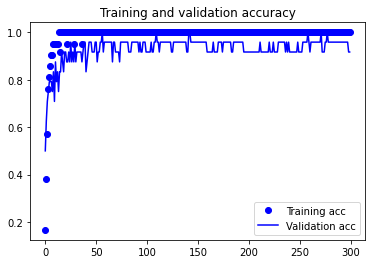

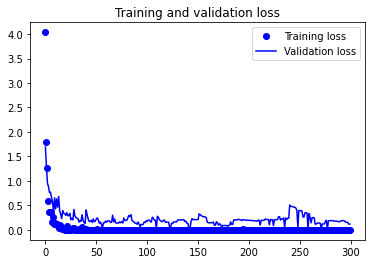

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import random
test_dir = '/content/efficientnet_keras_transfer_learning/test/'
test_imgs = []
for path, subdirs, files in os.walk(test_dir):
    for name in files:
        test_imgs.append(os.path.join(path, name))
random_test_image = random.choice(test_imgs)
random_test_image

'/content/efficientnet_keras_transfer_learning/test/4_else/-9-_jpg.rf.be86ae25853813236fc0a075d14aa8b0.jpg'

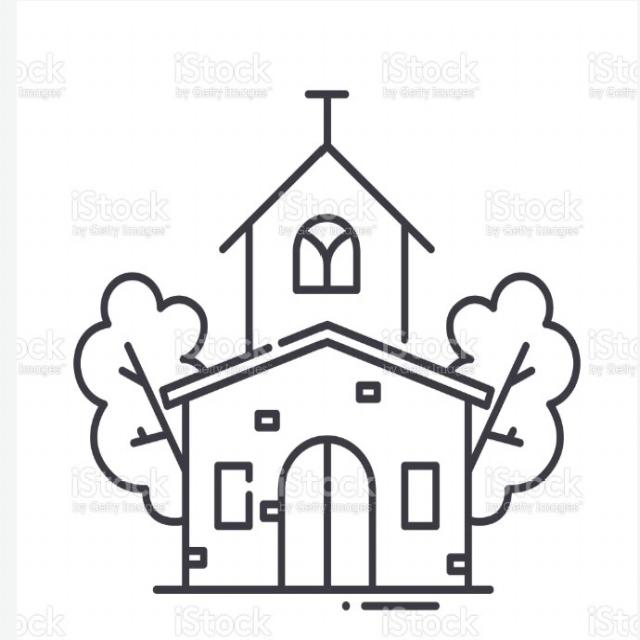

In [ ]:
Image(filename=random_test_image)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#recover class names from the train dataset generator
class_lookup = dict((y,x) for x,y in train_generator.class_indices.items())

def predict_image(img_path, class_lookup):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])[0][0]
    result_verbose = model.predict([x])
    if result > 0.5:
        animal = "cat"
    else:
        animal = "dog"
        result = 1 - result
    print(result_verbose)
    predicted_class = class_lookup[np.argmax(result_verbose, axis=1)[0]]
    predicted_probability = result_verbose[0][np.argmax(result_verbose, axis=1)[0]]

    return predicted_class ,predicted_probability, result_verbose

print(predict_image(random_test_image, class_lookup))

1/1 [==============================] - 0s 35ms/step
[[5.1570911e-05 3.4798632e-06 2.3367869e-04 9.9971122e-01]]
('4_else', 0.9997112, array([[5.1570911e-05, 3.4798632e-06, 2.3367869e-04, 9.9971122e-01]],
      dtype=float32))


In [ ]:
model.save('/content/drive/MyDrive/7 classes model/house_efficientNet_fin.h5')

In [ ]:
model = Model(inputs=base_model.input, outputs=net)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4,activation="softmax"))

In [ ]:
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(4, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0   

In [ ]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(300,300,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 40  1080        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 150, 150, 40  160         ['stem_conv[0][0]']              
                                )                                                           

In [ ]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=15)
# cp_callback = keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=7*BATCH_SIZE)

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=12,
    validation_split=0.2
    # callbacks=[cp_callback]
)

Epoch 1/300
13/13 [==============================] - 3s 39ms/step - loss: 3.1769 - acc: 0.2690 - val_loss: 9.0849 - val_acc: 0.2162
Epoch 2/300
13/13 [==============================] - 0s 18ms/step - loss: 2.4562 - acc: 0.2759 - val_loss: 2.1656 - val_acc: 0.2162
Epoch 3/300
13/13 [==============================] - 0s 18ms/step - loss: 1.7522 - acc: 0.2690 - val_loss: 1.9415 - val_acc: 0.2162
Epoch 4/300
13/13 [==============================] - 0s 17ms/step - loss: 1.5282 - acc: 0.3172 - val_loss: 3.8513 - val_acc: 0.2703
Epoch 5/300
13/13 [==============================] - 0s 18ms/step - loss: 1.7319 - acc: 0.2483 - val_loss: 1.4448 - val_acc: 0.2162
Epoch 6/300
13/13 [==============================] - 0s 18ms/step - loss: 1.5356 - acc: 0.2621 - val_loss: 1.7636 - val_acc: 0.1892
Epoch 7/300
13/13 [==============================] - 0s 18ms/step - loss: 1.5683 - acc: 0.2966 - val_loss: 1.6118 - val_acc: 0.0811
Epoch 8/300
13/13 [==============================] - 0s 18ms/step - loss: 1.

In [ ]:
# import tensorflow as tf
# import numpy as np
# test = tf.constant(np.ones((200,200)))

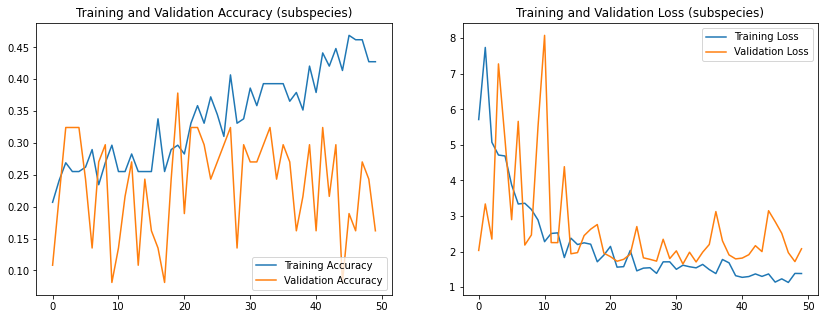

In [ ]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (subspecies)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (subspecies)')

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 1s 231ms/step - loss: 2.0215 - accuracy: 0.2436


[2.0215470790863037, 0.24358974397182465]

In [ ]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 29ms/step


In [ ]:
np.argmax(predictions[2])

3

In [ ]:
%cd /content/drive/MyDrive/7 classes model
from keras.models import load_model
model.save('house_type_model2.h5')

/content/drive/MyDrive/7 classes model


In [ ]:
y_test.head(10)

AttributeError: ignored

In [ ]:
predicted = model.predict(X_test)
y_pred=[]
for sample in  predicted:
  y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
y_pred = np.array(y_pred)
y_pred

3/3 [==============================] - 0s 52ms/step


array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0,

In [ ]:
from sklearn.metrics import classification_report
label_names = ['1_일반집', '2_현대집', '3_나무위의집', '4_교회']
print(classification_report(y_test, y_pred,target_names=label_names))

               precision    recall  f1-score   support

  1_일반집       0.17      0.56      0.26         9
   2_현대집       0.00      0.00      0.00        20
3_나무위의집       0.37      0.73      0.49        22
       4_교회       0.67      0.15      0.24        27

    micro avg       0.32      0.32      0.32        78
    macro avg       0.30      0.36      0.25        78
 weighted avg       0.36      0.32      0.25        78
  samples avg       0.32      0.32      0.32        78



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 28ms/step
4_교회 (1.0)
3_나무위의집 (1.19e-05)
1_일반집 (8.01e-17)
2_현대집 (3.16e-20)
3/3 [==============================] - 0s 15ms/step - loss: 9.3645 - acc: 0.3205
Accuracy =  32.05128312110901 %


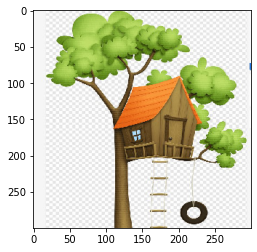

In [ ]:
img = image.load_img('/content/drive/MyDrive/집전체/집나무 (29).jpg', target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(result.columns[1:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(4):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))


_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

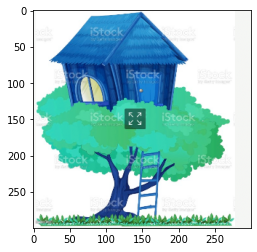

In [ ]:
image = cv2.imread('/content/drive/MyDrive/집전체/집나무 (20).jpg')
image = cv2.resize(image, dsize=(300, 300))
image = image/255.
plt.imshow(image)
test_image = np.array(image)

In [ ]:
final_test_image = np.expand_dims(test_image, axis=0)

In [ ]:
prediction = model.predict(final_test_image)

1/1 [==============================] - 0s 40ms/step


In [ ]:
np.argmax(prediction)

1

In [ ]:
prediction

array([[9.2818082e-05, 9.9949861e-01, 9.7032644e-05, 2.6655631e-04,
        4.4907403e-05]], dtype=float32)

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace().project("MODEL_ENDPOINT")
model = project.version(VERSION).model

# infer on a local image
print(model.predict("your_image.jpg").json())